In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('poster')
sns.set_style("whitegrid")

In [31]:
# azure_data = [
#     (3885, "Trusted (SSM)"),
#     (3504, "Trusted (SSM)"),
#     (3557, "Trusted (SSM)"),
#     (3768, "Trusted (SSM)"),
#     (3632, "Trusted (SSM)"),
#     (3572, "Untrusted (SSM)"),
#     (3660, "Untrusted (SSM)"),
#     (3792, "Untrusted (SSM)"),
#     (3852, "Untrusted (SSM)"),
#     (4033, "Untrusted (SSM)"),
#     (572, "Untrusted (USM)"),
#     (660, "Untrusted (USM)"),
#     (592, "Untrusted (USM)"),
#     (652, "Untrusted (USM)"),
#     (533, "Untrusted (USM)")
# ]
# azure_data = [
#     (5511, "Trusted (SSM)"),
#     (3357, "Trusted (SSM)"),
#     (3897, "Trusted (SSM)"),
#     (3513, "Trusted (SSM)"),
#     (3970, "Trusted (SSM)"),
#     (6288, "Untrusted (SSM)"),
#     (3524, "Untrusted (SSM)"),
#     (4010, "Untrusted (SSM)"),
#     (4631, "Untrusted (SSM)"),
#     (4361, "Untrusted (SSM)"),
#     (474, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (226, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (375, "Untrusted (USM)")
# ]
azure_data = [
    (4704, "Trusted (SSM)"),
    (3888, "Trusted (SSM)"),
    (3881, "Trusted (SSM)"),
    (3417, "Trusted (SSM)"),
    (3669, "Trusted (SSM)"),
    (5854, "Untrusted (SSM)"),
    (3760, "Untrusted (SSM)"),
    (3620, "Untrusted (SSM)"),
    (4743, "Untrusted (SSM)"),
    (4642, "Untrusted (SSM)"),
    (424, "Untrusted (USM)"),
    (521, "Untrusted (USM)"),
    (555, "Untrusted (USM)"),
    (301, "Untrusted (USM)"),
    (78, "Untrusted (USM)")
]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Create Type']) 

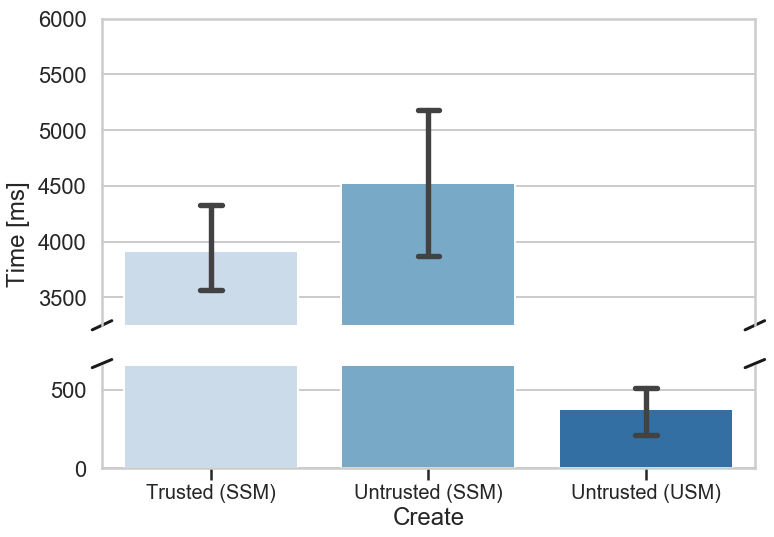

In [32]:
f,(ax,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# zoom-in / limit the view to different portions of the data
ax.set_ylim(3250, 6000)  # outliers only
ax2.set_ylim(0, 650)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax)
sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
ax2.set_ylabel('') 
ax2.tick_params(axis='x', labelsize=20)
ax.yaxis.set_label_coords(-.11,0.3)
ax2.set_xlabel('Create') 

# plt.savefig('PSecureCreateDataDiagram.png',dpi=500)
plt.show()


In [33]:
# azure_data = [
#     (322, "Trusted", "Initial"),
#     (162, "Trusted", "Initial"),
#     (277, "Trusted", "Initial"),
#     (86, "Trusted", "Initial"),
#     (237, "Trusted", "Initial"),
#     (336, "Untrusted", "Initial"),
#     (244, "Untrusted", "Initial"),
#     (255, "Untrusted", "Initial"),
#     (269, "Untrusted", "Initial"),
#     (238, "Untrusted", "Initial"),
#     (14, "Trusted", "Again"),
#     (12, "Trusted", "Again"),
#     (11, "Trusted", "Again"),
#     (15, "Trusted", "Again"),
#     (21, "Trusted", "Again"),
#     (19, "Untrusted", "Again"),
#     (28, "Untrusted", "Again"),
#     (23, "Untrusted", "Again"),
#     (23, "Untrusted", "Again"),
#     (22, "Untrusted", "Again")
# ]
# azure_data = [
#     (685, "Trusted", "Initial"),
#     (1080, "Trusted", "Initial"),
#     (492, "Trusted", "Initial"),
#     (692, "Trusted", "Initial"),
#     (348, "Trusted", "Initial"),
#     (457, "Untrusted", "Initial"),
#     (179, "Untrusted", "Initial"),
#     (149, "Untrusted", "Initial"),
#     (476, "Untrusted", "Initial"),
#     (293, "Untrusted", "Initial"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (8, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (25, "Untrusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (25, "Untrusted", "Again")
# ]
azure_data = [
    (409, "Trusted", "Initial"),
    (580, "Trusted", "Initial"),
    (1056, "Trusted", "Initial"),
    (488, "Trusted", "Initial"),
    (90, "Trusted", "Initial"),
    (176, "Untrusted", "Initial"),
    (320, "Untrusted", "Initial"),
    (972, "Untrusted", "Initial"),
    (228, "Untrusted", "Initial"),
    (259, "Untrusted", "Initial"),
    (16, "Trusted", "Again"),
    (12, "Trusted", "Again"),
    (14, "Trusted", "Again"),
    (16, "Trusted", "Again"),
    (10, "Trusted", "Again"),
    (20, "Untrusted", "Again"),
    (24, "Untrusted", "Again"),
    (19, "Untrusted", "Again"),
    (21, "Untrusted", "Again"),
    (19, "Untrusted", "Again")
]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Send Type', 'Phase']) 

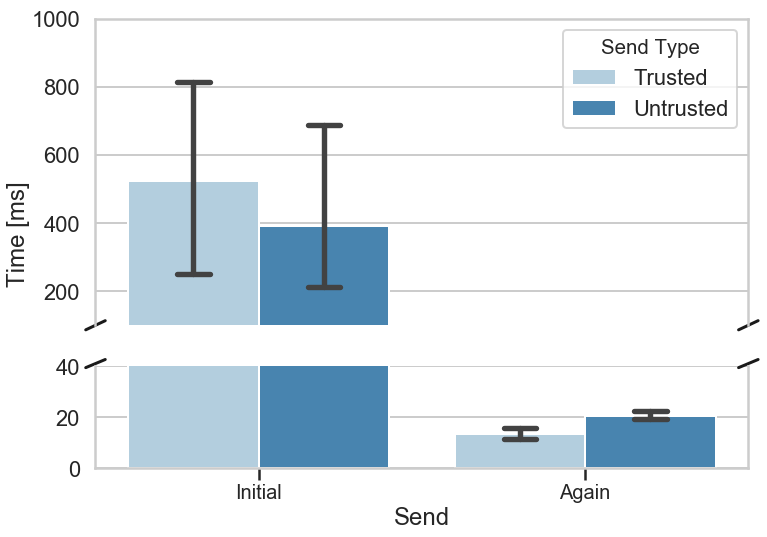

In [34]:
f,(ax,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# zoom-in / limit the view to different portions of the data
ax.set_ylim(100, 1000)  # outliers only
ax2.set_ylim(0, 40)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax)
sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
ax2.get_legend().set_visible(False)
ax2.set_ylabel('') 
ax2.tick_params(axis='x', labelsize=20)
ax.yaxis.set_label_coords(-.1,0.3)
ax2.set_xlabel('Send') 
# plt.savefig('PSecureSendDataDiagram.png',dpi=500)

plt.show()

In [35]:
# azure_data = [
#     (5511, "Trusted (SSM)"),
#     (3357, "Trusted (SSM)"),
#     (3897, "Trusted (SSM)"),
#     (3513, "Trusted (SSM)"),
#     (3970, "Trusted (SSM)"),
#     (6288, "Untrusted (SSM)"),
#     (3524, "Untrusted (SSM)"),
#     (4010, "Untrusted (SSM)"),
#     (4631, "Untrusted (SSM)"),
#     (4361, "Untrusted (SSM)"),
#     (474, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (226, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (375, "Untrusted (USM)")
# ]
azure_data = [
    (4704, "Trusted (SSM)"),
    (3888, "Trusted (SSM)"),
    (3881, "Trusted (SSM)"),
    (3417, "Trusted (SSM)"),
    (3669, "Trusted (SSM)"),
    (5854, "Untrusted (SSM)"),
    (3760, "Untrusted (SSM)"),
    (3620, "Untrusted (SSM)"),
    (4743, "Untrusted (SSM)"),
    (4642, "Untrusted (SSM)"),
    (424, "Untrusted (USM)"),
    (521, "Untrusted (USM)"),
    (555, "Untrusted (USM)"),
    (301, "Untrusted (USM)"),
    (78, "Untrusted (USM)")
]

azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Create Type']) 

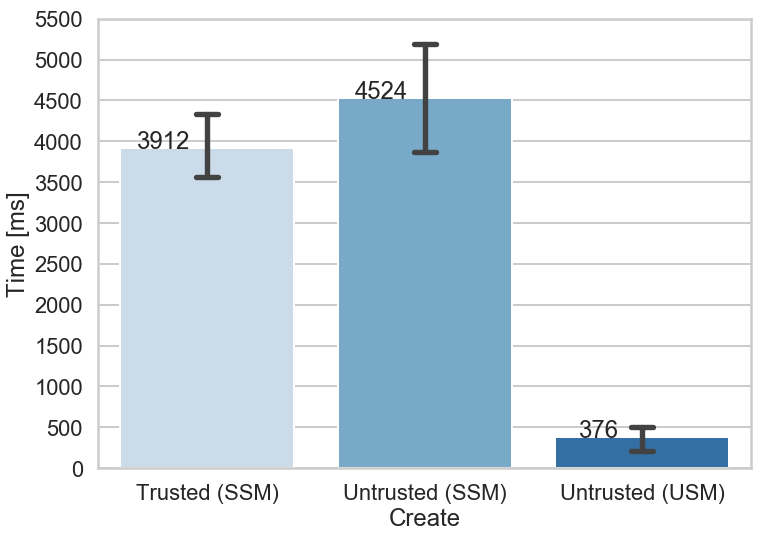

In [36]:

# # zoom-in / limit the view to different portions of the data
# ax.set_ylim(3250, 6000)  # outliers only
# ax2.set_ylim(0, 650)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

g = sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.11,0.3)
ax = plt.gca()
ax.set_xlabel('Create') 
plt.ylim(0, 5500)
plt.yticks(np.arange(0, 5501, 500))

# for index, row in groupedvalues.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 - 0.2
            _y = p.get_y() + p.get_height() + 0.1
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=24) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)


plt.savefig('PSecureCreateDataDiagram.png',dpi=500)
# plt.show()


In [37]:
# azure_data = [
#     (322, "Trusted", "Initial"),
#     (162, "Trusted", "Initial"),
#     (277, "Trusted", "Initial"),
#     (86, "Trusted", "Initial"),
#     (237, "Trusted", "Initial"),
#     (336, "Untrusted", "Initial"),
#     (244, "Untrusted", "Initial"),
#     (255, "Untrusted", "Initial"),
#     (269, "Untrusted", "Initial"),
#     (238, "Untrusted", "Initial"),
#     (14, "Trusted", "Again"),
#     (12, "Trusted", "Again"),
#     (11, "Trusted", "Again"),
#     (15, "Trusted", "Again"),
#     (21, "Trusted", "Again"),
#     (19, "Untrusted", "Again"),
#     (28, "Untrusted", "Again"),
#     (23, "Untrusted", "Again"),
#     (23, "Untrusted", "Again"),
#     (22, "Untrusted", "Again")
# ]
# azure_data = [
#     (685, "Trusted", "Initial"),
#     (1080, "Trusted", "Initial"),
#     (492, "Trusted", "Initial"),
#     (692, "Trusted", "Initial"),
#     (348, "Trusted", "Initial"),
#     (457, "Untrusted", "Initial"),
#     (179, "Untrusted", "Initial"),
#     (149, "Untrusted", "Initial"),
#     (476, "Untrusted", "Initial"),
#     (293, "Untrusted", "Initial"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (8, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (25, "Untrusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (25, "Untrusted", "Again")
# ]
azure_data = [
    (409, "Trusted", "Initial"),
    (580, "Trusted", "Initial"),
    (1056, "Trusted", "Initial"),
    (488, "Trusted", "Initial"),
    (90, "Trusted", "Initial"),
    (176, "Untrusted", "Initial"),
    (320, "Untrusted", "Initial"),
    (972, "Untrusted", "Initial"),
    (228, "Untrusted", "Initial"),
    (259, "Untrusted", "Initial"),
    (16, "Trusted", "Again"),
    (12, "Trusted", "Again"),
    (14, "Trusted", "Again"),
    (16, "Trusted", "Again"),
    (10, "Trusted", "Again"),
    (20, "Untrusted", "Again"),
    (24, "Untrusted", "Again"),
    (19, "Untrusted", "Again"),
    (21, "Untrusted", "Again"),
    (19, "Untrusted", "Again")
]

azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Send Type', 'Phase']) 

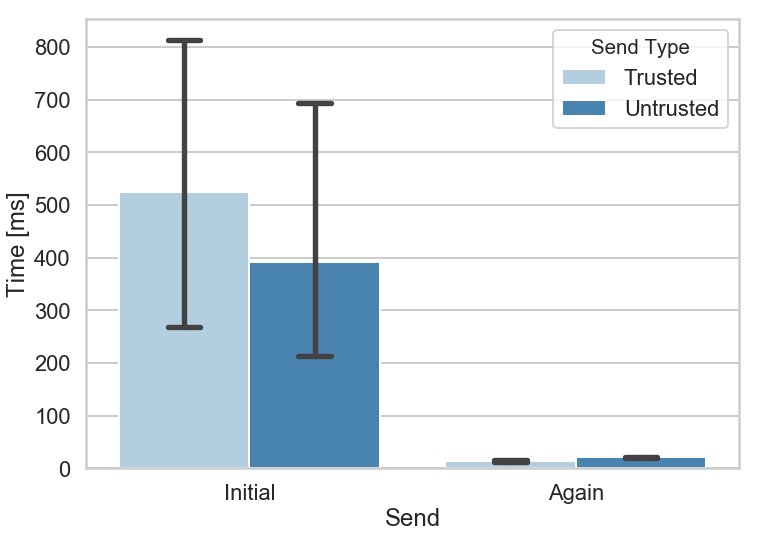

In [38]:

# zoom-in / limit the view to different portions of the data
# ax.set_ylim(100, 1000)  # outliers only
# ax2.set_ylim(0, 40)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.get_legend().set_visible(False)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.1,0.3)
ax = plt.gca()
ax.set_xlabel('Send') 
# plt.savefig('PSecureSendDataDiagram.png',dpi=500)

plt.show()

In [39]:
# azure_data = [
#     (685, "Trusted", "Initial"),
#     (1080, "Trusted", "Initial"),
#     (492, "Trusted", "Initial"),
#     (692, "Trusted", "Initial"),
#     (348, "Trusted", "Initial"),
#     (457, "Untrusted", "Initial"),
#     (179, "Untrusted", "Initial"),
#     (149, "Untrusted", "Initial"),
#     (476, "Untrusted", "Initial"),
#     (293, "Untrusted", "Initial")
# ]

azure_data = [
    (409, "Trusted", "Initial"),
    (580, "Trusted", "Initial"),
    (1056, "Trusted", "Initial"),
    (488, "Trusted", "Initial"),
    (90, "Trusted", "Initial"),
    (176, "Untrusted", "Initial"),
    (320, "Untrusted", "Initial"),
    (972, "Untrusted", "Initial"),
    (228, "Untrusted", "Initial"),
    (259, "Untrusted", "Initial")
]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Send (Initial)', 'Phase']) 

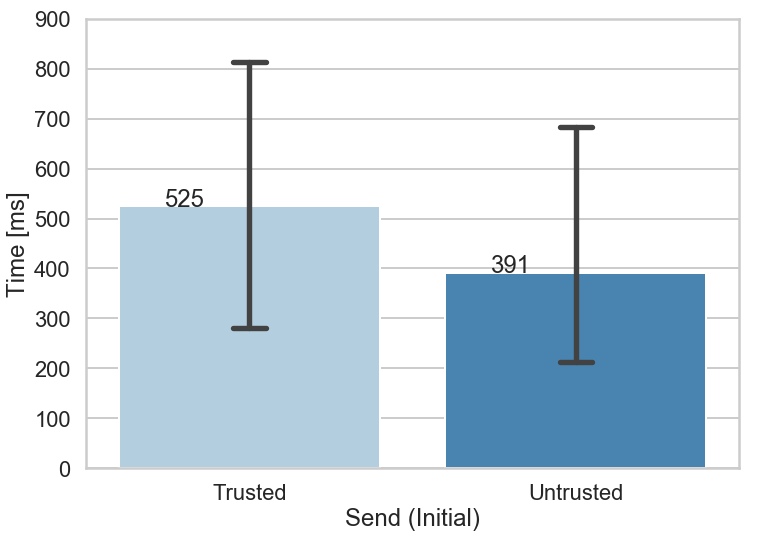

In [40]:

# zoom-in / limit the view to different portions of the data
# ax.set_ylim(100, 1000)  # outliers only
# ax2.set_ylim(0, 40)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Send (Initial)', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.get_legend().set_visible(False)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.1,0.3)
ax = plt.gca()
# plt.savefig('PSecureSendDataDiagram.png',dpi=500)
plt.ylim(0, 900)
plt.yticks(np.arange(0, 901, 100))
from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 - 0.2
            _y = p.get_y() + p.get_height() + 0.1
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=24) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)
plt.savefig('PSecureSendDataDiagram.png',dpi=500)

# plt.show()

In [41]:
# azure_data = [
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (17, "Trusted", "Again"),
#     (8, "Trusted", "Again"),
#     (16, "Trusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (25, "Untrusted", "Again"),
#     (18, "Untrusted", "Again"),
#     (20, "Untrusted", "Again"),
#     (25, "Untrusted", "Again")
# ]

azure_data = [
    (16, "Trusted", "Again"),
    (12, "Trusted", "Again"),
    (14, "Trusted", "Again"),
    (16, "Trusted", "Again"),
    (10, "Trusted", "Again"),
    (20, "Untrusted", "Again"),
    (24, "Untrusted", "Again"),
    (19, "Untrusted", "Again"),
    (21, "Untrusted", "Again"),
    (19, "Untrusted", "Again")
]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Send (Again)', 'Phase']) 

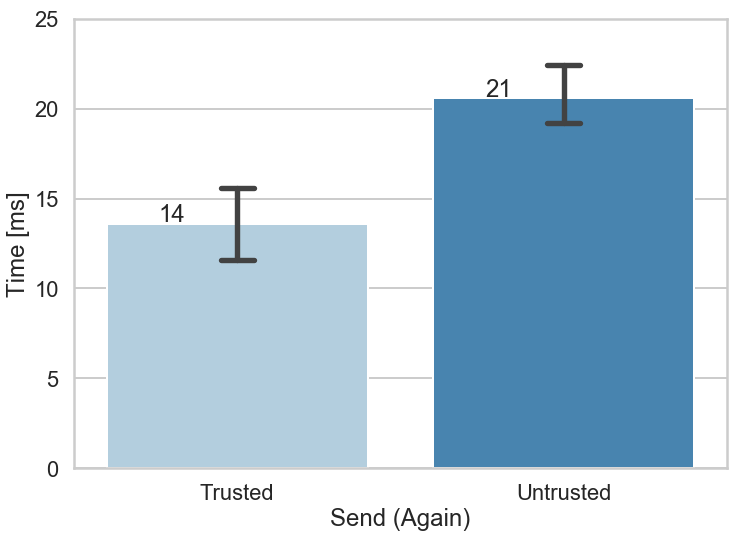

In [42]:

# zoom-in / limit the view to different portions of the data
# ax.set_ylim(100, 1000)  # outliers only
# ax2.set_ylim(0, 40)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

sns.barplot(x = 'Send (Again)', y = 'Time [ms]', data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Phase', y = 'Time [ms]', hue = 'Send Type', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.get_legend().set_visible(False)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.1,0.3)
ax = plt.gca()
# plt.savefig('PSecureSendDataDiagram.png',dpi=500)
plt.ylim(0, 25)
plt.yticks(np.arange(0, 26, 5))
from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 - 0.2
            _y = p.get_y() + p.get_height() + 0.1
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=24) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

plt.savefig('PSecureSendDataAgainDiagram.png',dpi=500)
# plt.show()